In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_row", None)

In [53]:
df = pd.read_csv("/content/glassdoor_jobs_cleaned.csv")

In [54]:
df.describe()

,Rating,hourly,min_salary,max_salary,avr_salary,age,desc_len,num_comp,employees_num,revenue_avr
count,731.000000,742.000000,742.000000,742.000000,742.000000,692.000000,742.000000,742.000000,732.000000,538.000000
mean,3.688372,0.032345,74.771752,128.226900,101.499326,53.030347,542.708895,1.053908,3380.158470,3.131455
std,0.570353,0.177034,30.926958,45.110814,37.463032,54.089762,216.968374,1.384239,3763.516411,4.058796
min,1.900000,0.000000,15.000000,16.000000,15.500000,4.000000,65.000000,0.000000,25.500000,0.001000
25%,3.300000,0.000000,52.000000,96.000000,73.500000,16.000000,390.000000,0.000000,350.500000,0.075000
50%,3.700000,0.000000,69.500000,124.000000,97.500000,31.000000,522.500000,0.000000,750.500000,0.750000
75%,4.000000,0.000000,91.000000,155.000000,122.500000,65.000000,664.250000,3.000000,7500.500000,7.500000
max,5.000000,1.000000,202.000000,306.000000,254.000000,279.000000,1595.000000,4.000000,10000.000000,10.000000


In [55]:
df.columns

Index(['Location', 'Headquarters', 'Type of ownership', 'Industry', 'Rating',
       'Sector', 'Job Description', 'hourly', 'min_salary', 'max_salary',
       'avr_salary', 'company_txt', 'age', 'job_state', 'same_state',
       'python_yn', 'R_yn', 'sql_yn', 'excel_yn', 'job_title', 'seniority',
       'desc_len', 'num_comp', 'employees_num', 'revenue_avr'],
      dtype='object')

<Axes: >

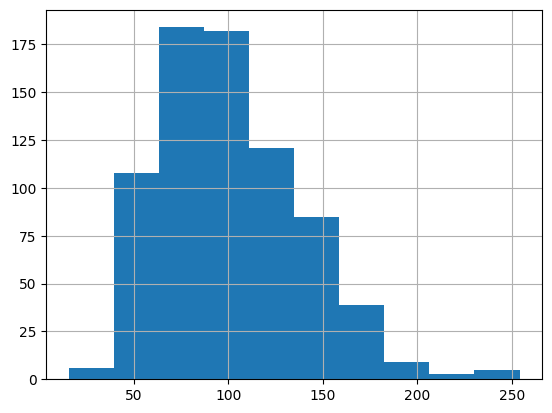

In [56]:
df["avr_salary"].hist()

<Axes: >

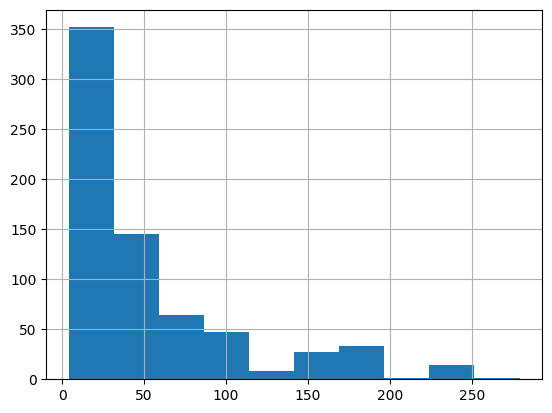

In [57]:
df["age"].hist()

<Axes: >

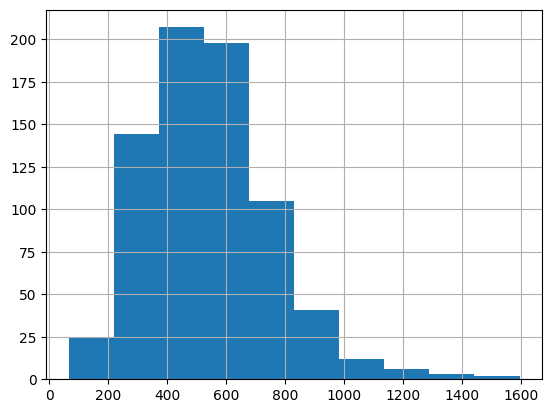

In [58]:
df["desc_len"].hist()

<Axes: >

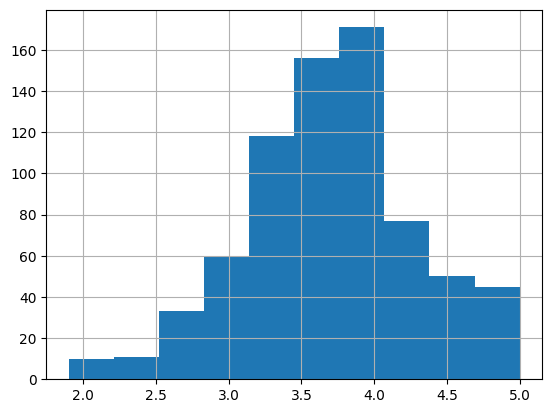

In [59]:
df["Rating"].hist()

<Axes: >

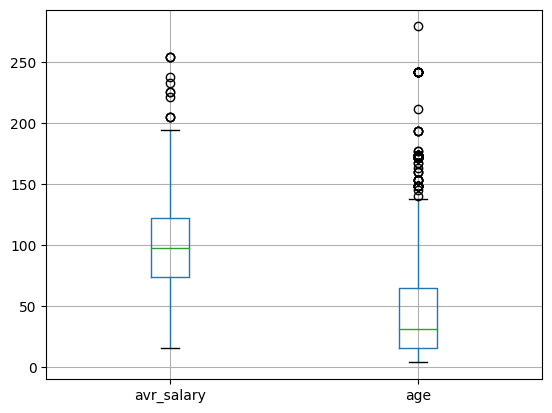

In [60]:
df.boxplot(["avr_salary", "age"])

<Axes: >

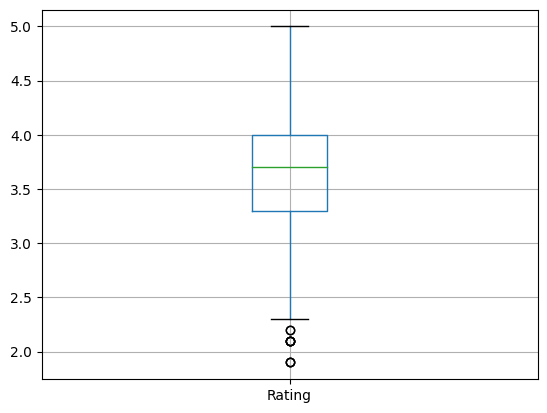

In [61]:
df.boxplot(["Rating"])

<Axes: >

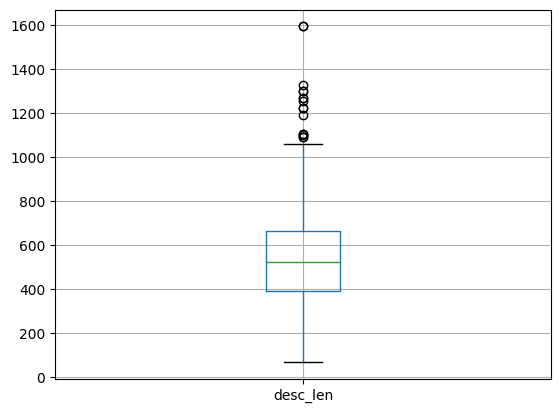

In [62]:
df.boxplot(["desc_len"])

<Axes: >

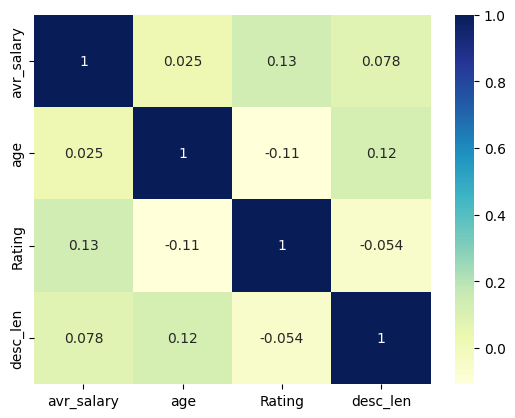

In [63]:
data = df[["avr_salary", "age", "Rating", "desc_len"]].corr()
sns.heatmap(data, cmap="YlGnBu", annot=True)

In [65]:
df_cat = df[['Location', 'Headquarters', 'Type of ownership', 'Industry',
       'Sector', 'company_txt', 'job_state', 'same_state', 'python_yn', 'R_yn',
       'sql_yn', 'excel_yn', 'job_title', 'seniority', 'num_comp',
       'employees_num', 'revenue_avr']]


 Graph for Location, total = 200


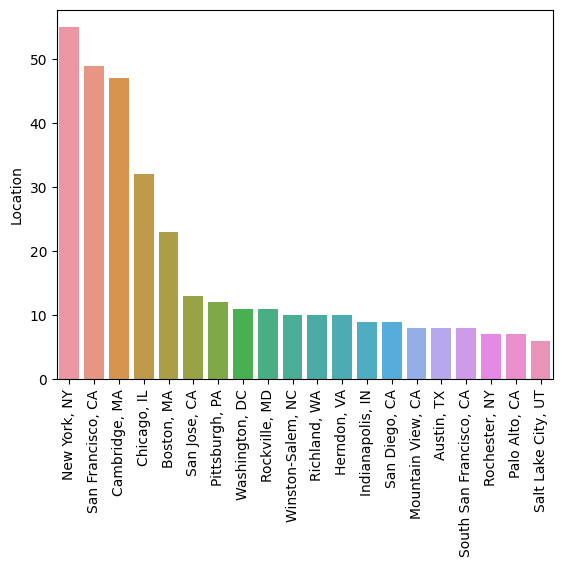


 Graph for Headquarters, total = 197


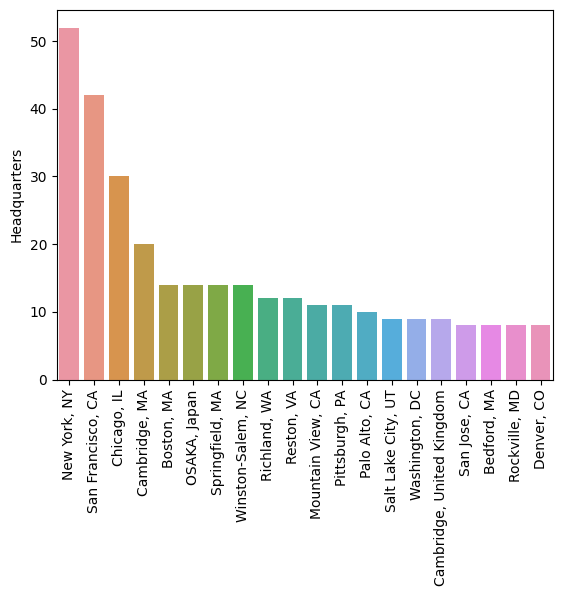


 Graph for Type of ownership, total = 10


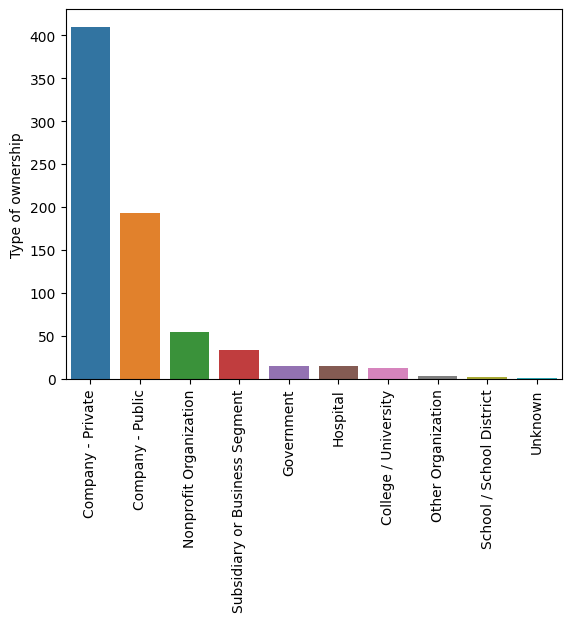


 Graph for Industry, total = 59


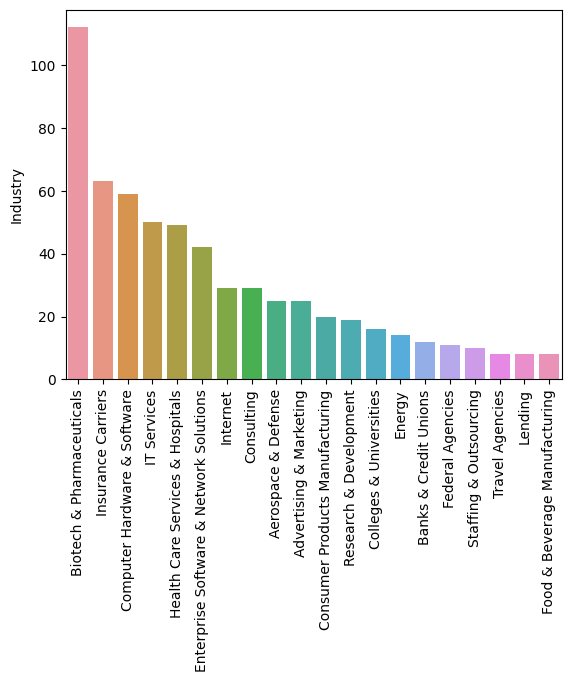


 Graph for Sector, total = 24


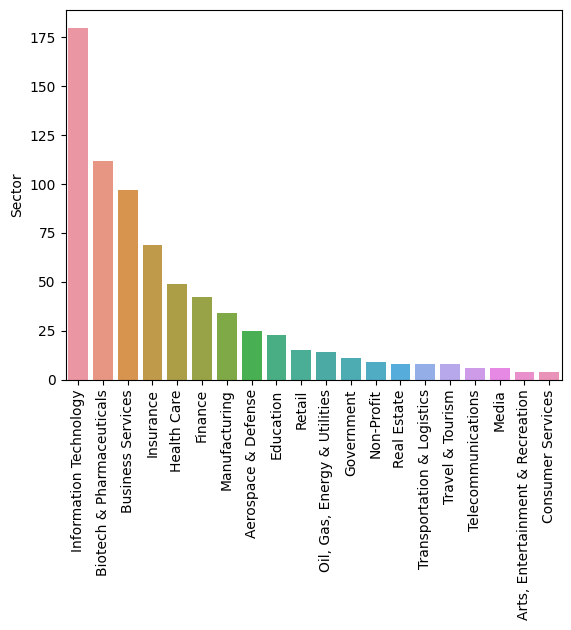


 Graph for company_txt, total = 343


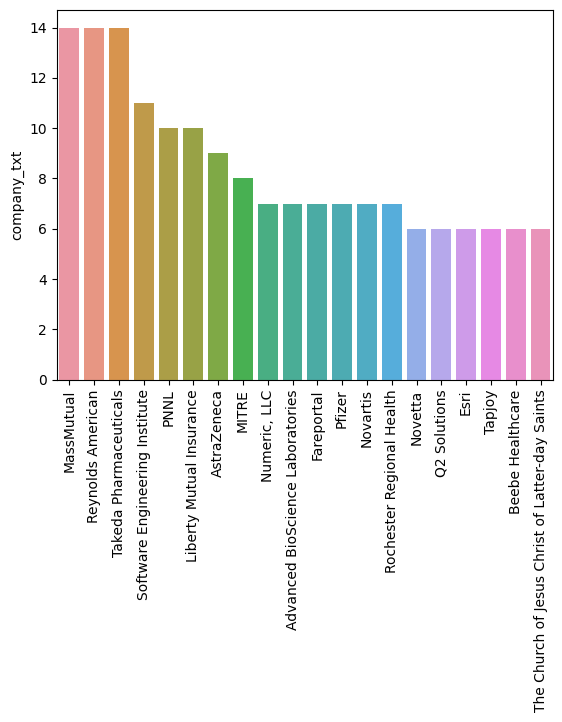


 Graph for job_state, total = 37


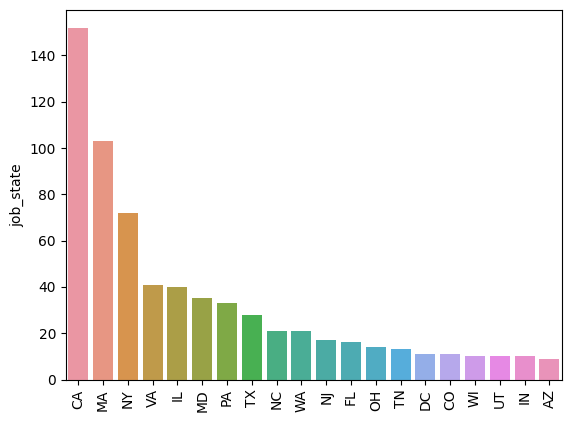


 Graph for same_state, total = 2


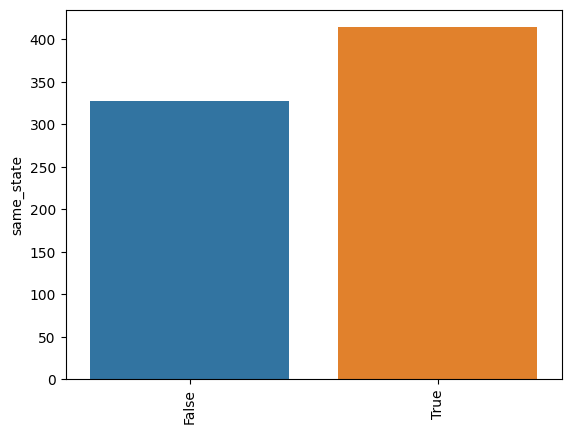


 Graph for python_yn, total = 2


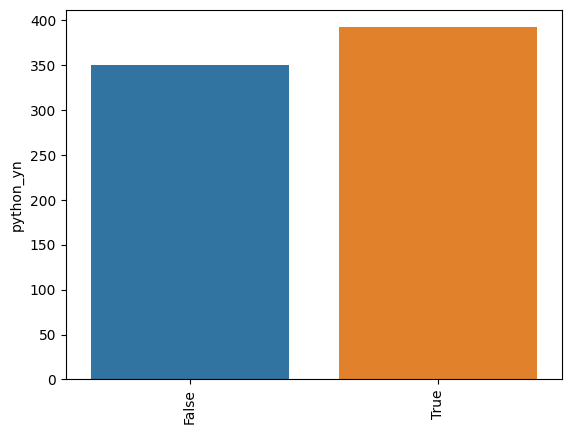


 Graph for R_yn, total = 2


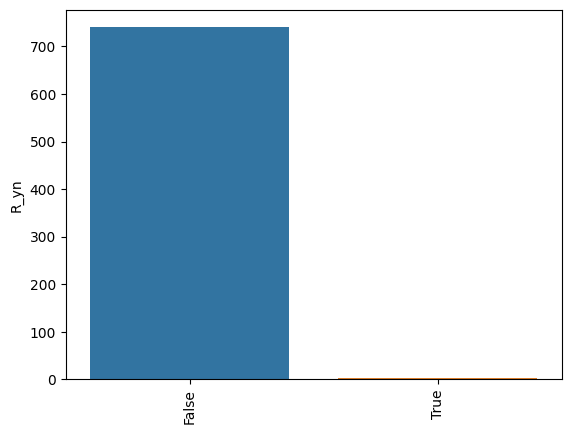


 Graph for sql_yn, total = 2


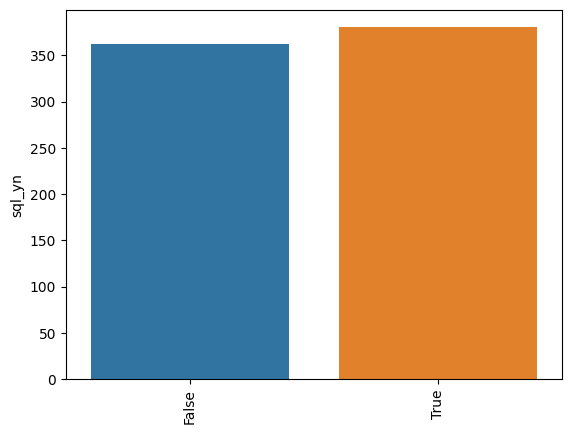


 Graph for excel_yn, total = 2


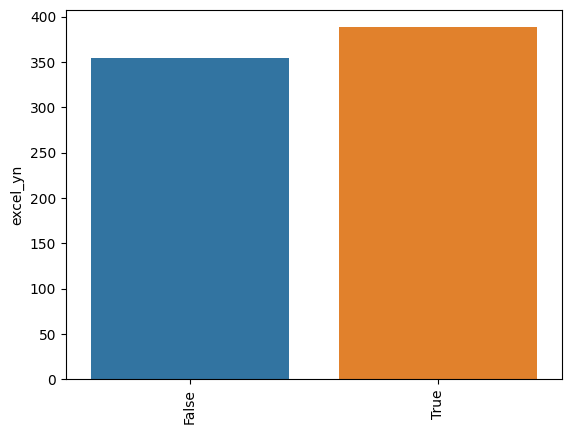


 Graph for job_title, total = 7


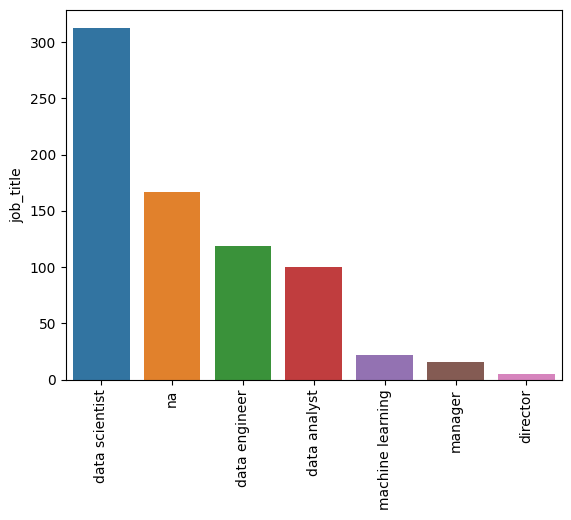


 Graph for seniority, total = 3


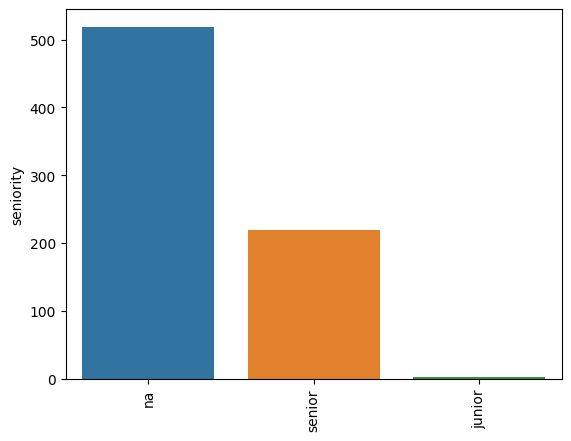


 Graph for num_comp, total = 5


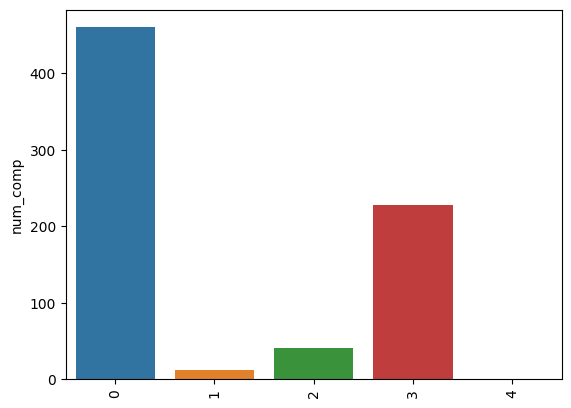


 Graph for employees_num, total = 7


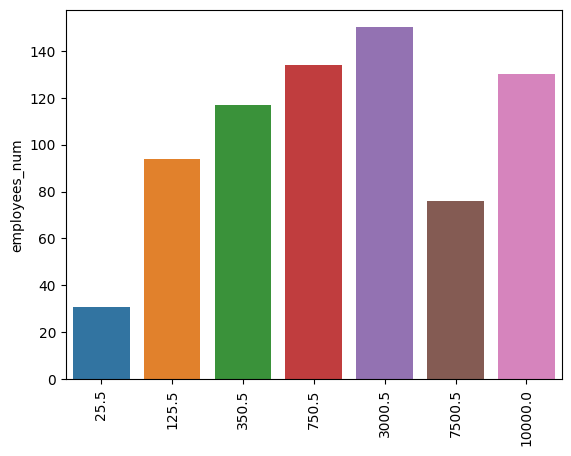


 Graph for revenue_avr, total = 12


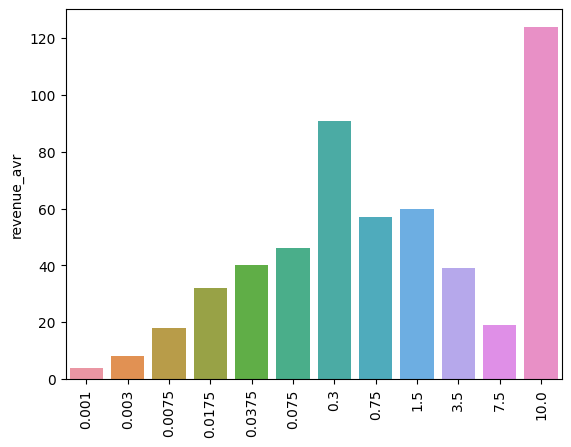

In [66]:
for col in df_cat.columns:
  val_counts = df_cat[col].value_counts()
  print(f'\n Graph for {col}, total = {len(val_counts)}')

  if len(val_counts)>20: val_counts = val_counts[:20]
  sns.barplot(x=val_counts.index, y=val_counts)
  plt.xticks(rotation=90)
  plt.show()

In [67]:
df.columns

Index(['Location', 'Headquarters', 'Type of ownership', 'Industry', 'Rating',
       'Sector', 'Job Description', 'hourly', 'min_salary', 'max_salary',
       'avr_salary', 'company_txt', 'age', 'job_state', 'same_state',
       'python_yn', 'R_yn', 'sql_yn', 'excel_yn', 'job_title', 'seniority',
       'desc_len', 'num_comp', 'employees_num', 'revenue_avr'],
      dtype='object')

In [69]:
pd.pivot_table(df, values="avr_salary", index="job_title", aggfunc="mean").sort_values("avr_salary", ascending=False)

,avr_salary
job_title,
director,130.800000
machine learning,126.431818
data scientist,118.293930
data engineer,105.403361
na,87.499042
manager,73.218750
data analyst,65.241600


In [71]:
pd.pivot_table(df, values="avr_salary", index=["job_title", "seniority"], aggfunc="mean")

avr_salary
job_title        seniority            
data analyst     junior      53.250000
                 na          61.472222
                 senior      76.602308
data engineer    na          96.701220
                 senior     124.689189
data scientist   junior     106.500000
                 na         110.191038
                 senior     135.590000
director         na         130.800000
machine learning na         119.133333
                 senior     142.071429
manager          na          73.218750
na               na          76.904615
                 senior     112.290000

In [72]:
pd.pivot_table(df, values="avr_salary", index="job_state", aggfunc="mean").sort_values("avr_salary", ascending=False)

,avr_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.503107
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [74]:
pd.pivot_table(df, values="avr_salary", index=["job_state", "job_title"], aggfunc="count").sort_values("job_state", ascending=True)

avr_salary
job_state job_title                   
AL        data analyst               4
          data engineer              1
          data scientist             1
          na                         2
AZ        data analyst               1
          data engineer              5
          data scientist             3
CA        manager                    7
          machine learning           5
          na                        23
          data engineer             25
          data analyst              18
          data scientist            74
CO        data analyst               1
          data engineer              3
          data scientist             3
          machine learning           1
          na                         3
CT        data scientist             2
          na                         3
DC        data analyst               2
          data engineer              4
          data scientist             5
DE        na                         6
FL        data engineer              3
          data scientist             7
          data analyst               6
GA        data scientist             3
          na                         3
IA        data analyst               2
          data engineer              3
ID        data analyst               2
IL        na                         6
          data analyst               3
          data engineer              8
          data scientist            21
          machine learning           2
IN        data scientist             3
          na                         3
          data engineer              4
KS        machine learning           3
KY        data scientist             2
          na                         4
LA        data analyst               1
          data engineer              2
          na                         1
MA        manager                    3
          director                   5
          na                        42
          data engineer             12
          data analyst               4
          data scientist            37
MD        na                        16
          data scientist            13
          data engineer              3
          data analyst               3
MI        data scientist             4
          manager                    2
MN        data analyst               1
          data engineer              1
MO        data analyst               2
          data scientist             3
          manager                    1
          na                         3
NC        data scientist             3
          na                        12
          data engineer              6
NE        na                         4
NJ        data analyst               5
          data engineer              2
          data scientist             6
          manager                    2
          na                         2
NM        data scientist             3
NY        na                        12
          data analyst              14
          data engineer              4
          data scientist            40
          machine learning           2
OH        na                         4
          data scientist             7
          data analyst               3
OR        data engineer              1
          data scientist             3
PA        data analyst               8
          data engineer              1
          data scientist            10
          machine learning           7
          manager                    1
          na                         6
RI        data analyst               1
SC        na                         1
TN        data scientist             1
          data engineer             10
          data analyst               2
TX        data engineer              8
          data scientist            13
          na                         7
UT        data analyst               4
          data engineer              3
          data scientist             3
VA        d

In [75]:
pd.pivot_table(df[df["job_title"]=="data scientist"], values="avr_salary", index=["job_state"]).sort_values("avr_salary", ascending=False)

,avr_salary
job_state,
DC,149.000000
IL,147.095238
CA,141.047297
UT,140.500000
MO,127.666667
NJ,125.083333
NC,117.000000
PA,115.800000
NY,115.250000


In [76]:
df.columns

Index(['Location', 'Headquarters', 'Type of ownership', 'Industry', 'Rating',
       'Sector', 'Job Description', 'hourly', 'min_salary', 'max_salary',
       'avr_salary', 'company_txt', 'age', 'job_state', 'same_state',
       'python_yn', 'R_yn', 'sql_yn', 'excel_yn', 'job_title', 'seniority',
       'desc_len', 'num_comp', 'employees_num', 'revenue_avr'],
      dtype='object')

In [77]:
df_pivot = df[['Rating', 'Industry', 'Sector', 'revenue_avr', 'num_comp', 'hourly', 'python_yn', 'R_yn', 'sql_yn', 'excel_yn', 'Type of ownership','avr_salary']]

In [78]:
for col in df_pivot.columns:
  if col=="avr_salary": continue
  print("\n", col)
  print(pd.pivot_table(df, values="avr_salary", index=col).sort_values("avr_salary", ascending=False))


 Rating
        avr_salary
Rating            
5.0     134.700000
2.5     120.000000
4.5     117.714286
4.1     116.368421
3.9     113.071429
2.6     109.083333
4.4     108.606061
4.0     107.316596
3.2     107.042857
3.7     105.804262
3.5     104.897959
3.3     104.060513
4.7     103.983871
4.3     102.468750
4.2     100.442308
2.2      97.750000
3.8      97.466557
4.6      97.250000
2.1      95.900000
3.4      93.502273
3.6      90.303913
1.9      87.500000
3.1      86.580000
3.0      85.588235
2.7      85.332857
2.8      83.928571
2.3      81.500000
2.9      81.138889
4.8      80.277778
2.4      60.214286

 Industry
                                          avr_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
B

In [81]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

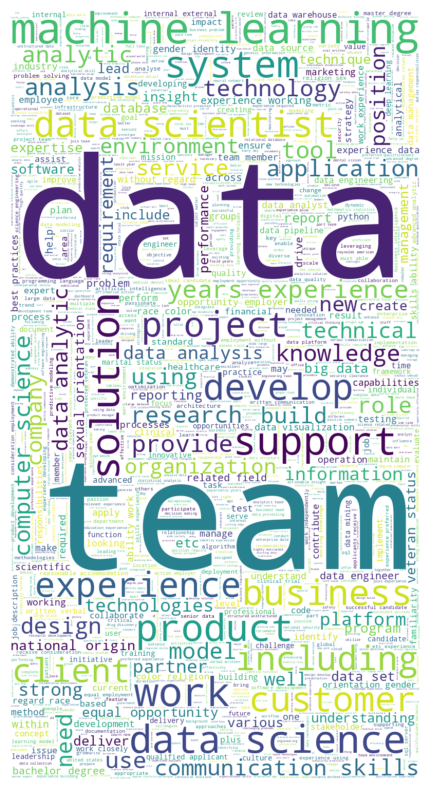

In [85]:
words = " ".join(df['Job Description'])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()